# 확률분포의 종류

- 이항분포
      binom
- 다항분포
      multinomial
- 정규분포
      norm
- 균일분포
      uniform
- 베타분포
      beta
- 감마분포
      gamma
- t - 분포
      t
- 카이제곱분포
      chi2

## 모수 지정
평균, 편차

분포의 기대값, 표준편차

    pdf : 확률밀도함수
    pmf : 확률질량함수
    cdf : 누적확률밀도함수
    ppf : cdf의 역함수

In [1]:
import scipy as sp
rv = sp.stats.norm(1,2)

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import numpy as np



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


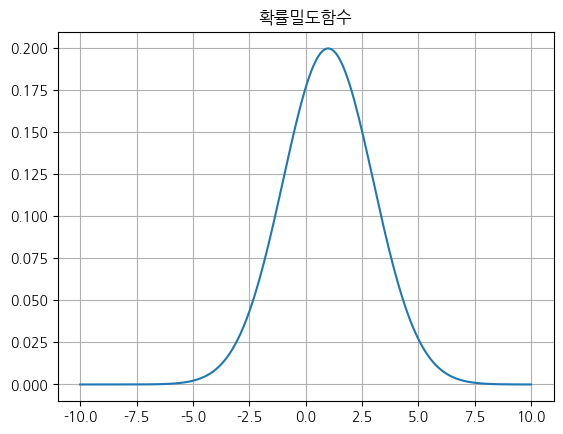

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 200)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.title('확률밀도함수')
plt.grid()
plt.show()

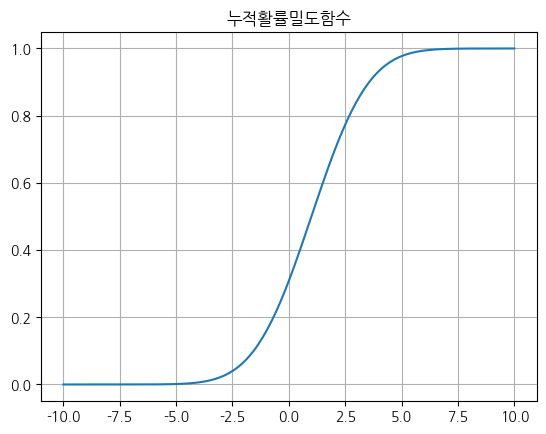

In [4]:
cdf = rv.cdf(x)
plt.plot(x, cdf)
plt.title('누적활률밀도함수')
plt.grid()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5132\3698983742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rv.rvs(size = 10000, random_state = 0))


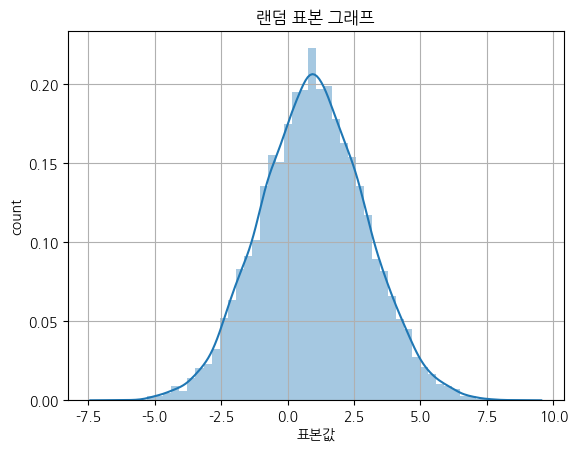

In [5]:
import seaborn as sns
# random value sampling
sns.distplot(rv.rvs(size = 10000, random_state = 0))
plt.title('랜덤 표본 그래프')
plt.xlabel('표본값')
plt.ylabel('count')
plt.grid()
plt.show()

변환 확률 변수의 시뮬레이션

C:\Users\user\AppData\Local\Temp\ipykernel_5132\3678284751.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_1, kde = False)
C:\Users\user\AppData\Local\Temp\ipykernel_5132\3678284751.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_2, kde = False)
C:\Users\user\AppData\Local\Temp\ipy

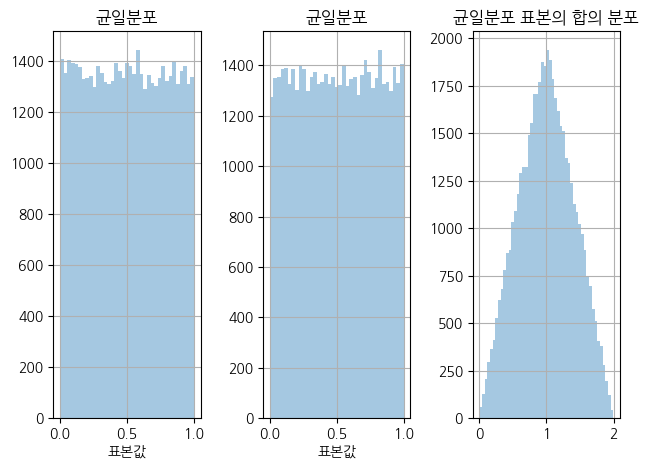

In [6]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.subplot(131)
sns.distplot(x_1, kde = False)
plt.title('균일분포')
plt.xlabel('표본값')
plt.grid()

plt.subplot(132)
sns.distplot(x_2, kde = False)
plt.title('균일분포')
plt.xlabel('표본값')
plt.grid()

plt.subplot(133)
sns.distplot(x_3, kde = False)
plt.title('균일분포 표본의 합의 분포')
plt.grid()
plt.tight_layout()
plt.show()

### 베르누이 분포
bernoulli

베르누이 실험 : 결과 두개 밖에 없는 실험 (동전)

베르누이의 확률변수 : 이산확률변수 {0, 1}, {-1, 1}
$$Bern(x;μ)={μ^x}{(1-μ)^{(1-x)}}$$

In [7]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
rv

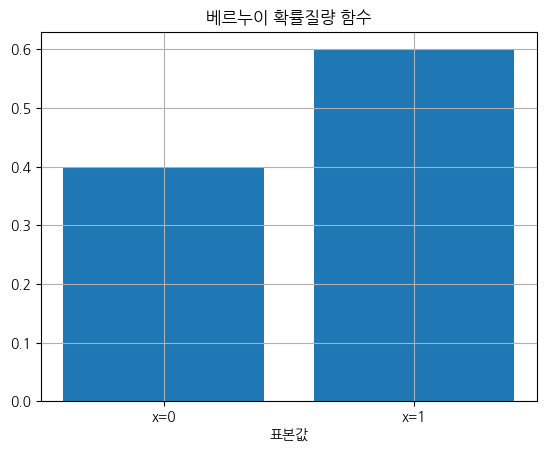

In [8]:
x = [0, 1]
plt.bar(x, rv.pmf(x))
plt.xticks([0,1], ['x=0','x=1'])
plt.grid()
plt.xlabel('표본값')
plt.title('베르누이 확률질량 함수')
plt.show()

In [9]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

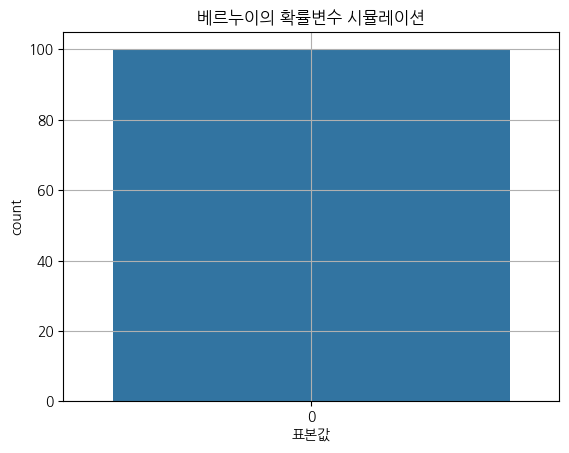

In [10]:
sns.countplot(x)
plt.title('베르누이의 확률변수 시뮬레이션')
plt.xlabel('표본값')
plt.grid()
plt.show()

In [11]:
import pandas as pd

y = np.bincount(x, minlength = 2)/float(len(x))
y
df = pd.DataFrame({'이론':rv.pmf([0,1]), '시뮬레이션' : y})
df.index = [0,1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [12]:
for i in range(200):
  x = rv.rvs(i, random_state=0)
  y = np.bincount(x, minlength=2)/float(len(x))
  print(f'표본 수가 {i}개 일때 이론값 : {rv.pmf([0,1])}, 표본값 : {y}')


표본 수가 0개 일때 이론값 : [0.4 0.6], 표본값 : [nan nan]
표본 수가 1개 일때 이론값 : [0.4 0.6], 표본값 : [0. 1.]
표본 수가 2개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 3개 일때 이론값 : [0.4 0.6], 표본값 : [0.66666667 0.33333333]
표본 수가 4개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 5개 일때 이론값 : [0.4 0.6], 표본값 : [0.4 0.6]
표본 수가 6개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 7개 일때 이론값 : [0.4 0.6], 표본값 : [0.42857143 0.57142857]
표본 수가 8개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 9개 일때 이론값 : [0.4 0.6], 표본값 : [0.55555556 0.44444444]
표본 수가 10개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 11개 일때 이론값 : [0.4 0.6], 표본값 : [0.54545455 0.45454545]
표본 수가 12개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 13개 일때 이론값 : [0.4 0.6], 표본값 : [0.46153846 0.53846154]
표본 수가 14개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 15개 일때 이론값 : [0.4 0.6], 표본값 : [0.46666667 0.53333333]
표본 수가 16개 일때 이론값 : [0.4 0.6], 표본값 : [0.4375 0.5625]
표본 수가 17개 일때 이론값 : [0.4 0.6], 표본값 : [0.41176471 0.58823529]
표본 수가 18개 일때 이론값 : [0.4 0.6], 표본값 : [0.44444444 0.55555556]
표본 수가 19개 일때 이론값 : [

C:\Users\user\AppData\Local\Temp\ipykernel_5132\3206596756.py:3: RuntimeWarning: invalid value encountered in divide
  y = np.bincount(x, minlength=2)/float(len(x))


### 이항분포
베르누이 분포에서 실험을 여러번 한 것이 이항 분포

$$ X∼Bin(x;N,μ)$$

표본 중 성공일 경우 1 아닐경우 0

N개의 표본 중 성공 횟수는 N개의 표본을 모두 더한 것과 같다.
$$x=\Sigma{y_i}$$

확률 질량 함수
$$bin(x;N,μ) = \binom{N}{x}{μ^x}{(1-μ)}^{(N-x)}$$

In [13]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

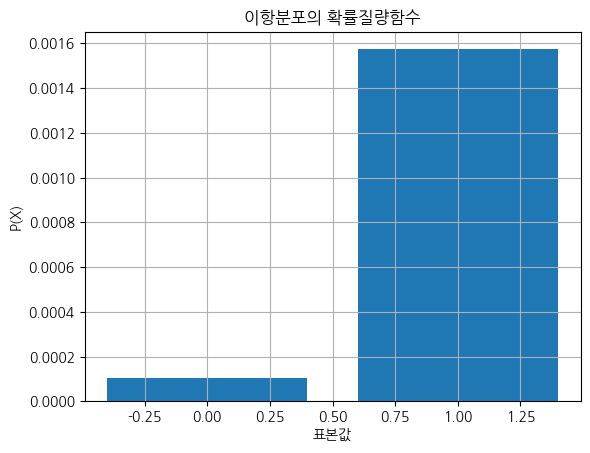

In [14]:
x_ = np.arange(N+1)
plt.bar(x, rv.pmf(x), align = 'center')
plt.title('이항분포의 확률질량함수')
plt.xlabel('표본값')
plt.ylabel('P(X)')
plt.grid()
plt.show()

이항분포 시뮬레이션

In [15]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10],
      dtype=int64)

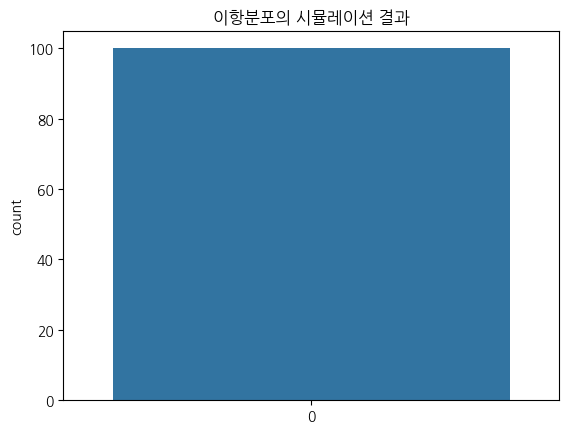

In [16]:
sns.countplot(x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel = ('표본값')
plt.show()

In [17]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'이론':rv.pmf(x_), '시뮬레이션':y}).stack()

In [18]:
df = df.reset_index()
df.columns = ['표본값','유형','비율']

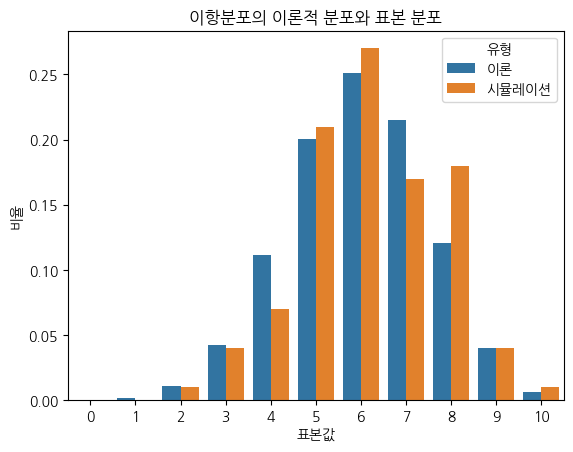

In [19]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('이항분포의 이론적 분포와 표본 분포')
plt.show()

### 정규분포
가우스 분포라고도 함

보통 자연현상에 나타나는 수치 정규분포 가정을 많이 함

$$ N(x;μ,{q^2}) = \frac{1}{{(2π{q^2})}^\frac{1}{2}}exp(-\frac{{(x-μ)}^2}{2{q^2}})$$

In [20]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

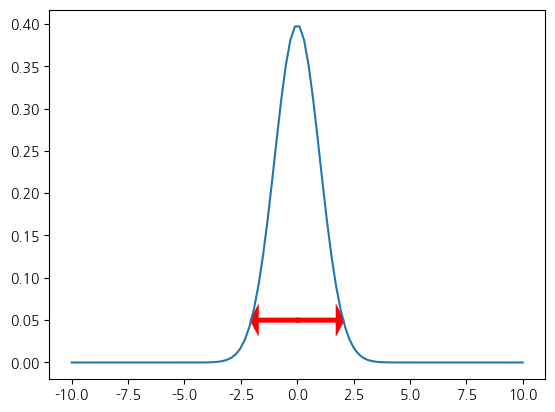

In [21]:
x_ = np.linspace(-10, 10, 100)
plt.plot(x_, rv.pdf(x_))
plt.arrow(0, 0.05, 2, 0, lw = 3, color = 'r', head_width = 0.02, head_length = 0.2, length_includes_head = True)
plt.arrow(0, 0.05, -2, 0, lw = 3, color = 'r', head_width = 0.02, head_length = 0.2, length_includes_head = True)
plt.show()

In [22]:
np.random.seed(10)
x = rv.rvs(100)
x

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

C:\Users\user\AppData\Local\Temp\ipykernel_5132\1144431641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, fit = sp.stats.norm)


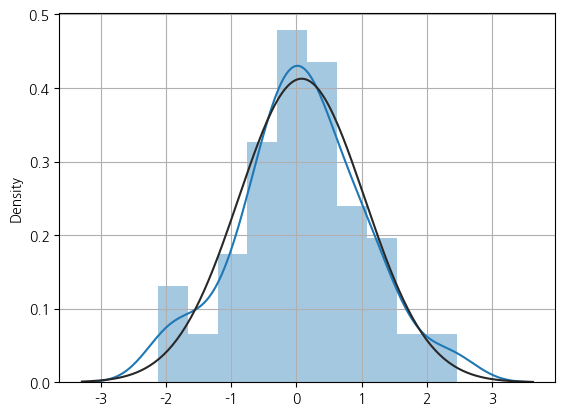

In [23]:
# 표본 생성 결과
sns.distplot(x, fit = sp.stats.norm) 
plt.grid()
plt.show()
# 파란 선 : 실제 값, 검은 선 실제 값의 표준 정규 분포
# rvs 값이 증가할 수록 정규분포와 점점 일치해진다.

C:\Users\user\AppData\Local\Temp\ipykernel_5132\3610417948.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(setosa_sepal_length, rug=True)


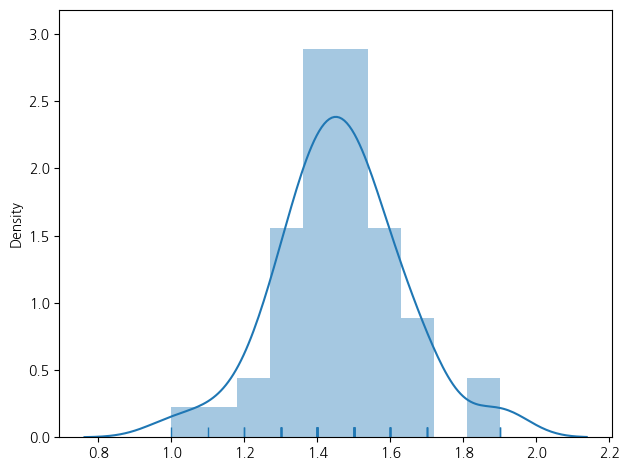

In [24]:
from sklearn.datasets import load_iris

setosa_sepal_length = load_iris().data[:50,2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()


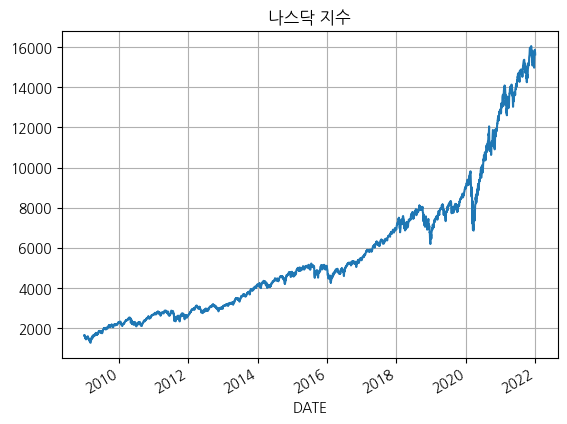

In [25]:
import pandas_datareader.data as web

symbol = 'NASDAQCOM'
data = web.DataReader(symbol, data_source = 'fred', start = '2009-01-01', end = '2021-12-31')[symbol]
data = data.dropna()
data.plot(legend = False)
plt.grid()
plt.title('나스닥 지수')
plt.show()

In [26]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean()
std = daily_returns.std()
mean*100, std*100

(0.07716675707786935, 1.269632222896445)

C:\Users\user\AppData\Local\Temp\ipykernel_5132\1279915065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_returns, kde = True)


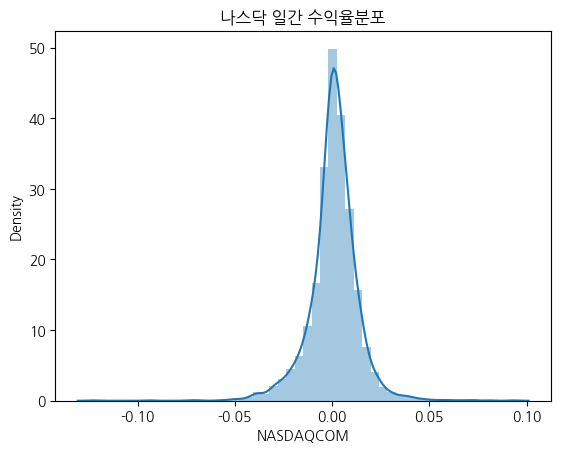

In [27]:
sns.distplot(daily_returns, kde = True)
plt.title('나스닥 일간 수익율분포')
plt.show()

### 로그정규 분포

항상 양수인 데이터

가정할 수 있는 분포

C:\Users\user\AppData\Local\Temp\ipykernel_5132\1395583371.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, kde=False, ax= ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_5132\1395583371.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, ax=ax[1], kde= False)


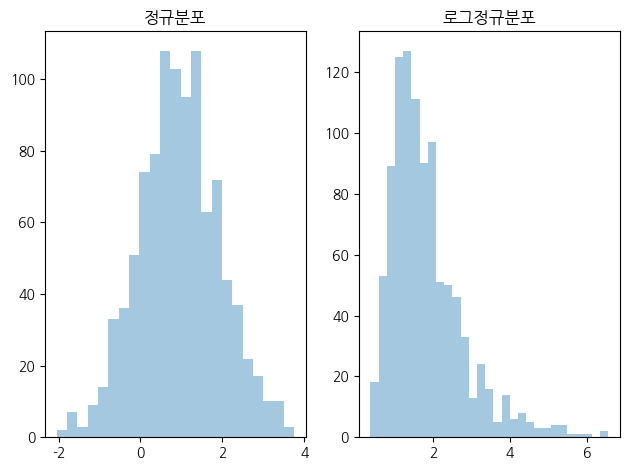

In [28]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(mu)
x1 = rv.rvs(1000)
s = .5
x2 = np.exp(s * x1)
fig, ax = plt.subplots(1,2)
sns.distplot(x1, kde=False, ax= ax[0])
ax[0].set_title('정규분포')
sns.distplot(x2, ax=ax[1], kde= False)
ax[1].set_title('로그정규분포')
plt.tight_layout()
plt.show()

## Q-Q 플롯

어떤 확률변수의 분포가 정규분포인지 검사하는 그래프

정규분포를 따를 때 Q-Q플롯은 직선의 형태를 가진다.

정규분포를 따르지 않을 때 Q-Q플롯은 곡선이 발생

In [29]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

In [30]:
x = rv.rvs(100)
x_sorted = np.sort(x)
x_sorted

array([-1.81807763, -1.775888  , -1.67868836, -1.63880731, -1.43273549,
       -1.42999126, -1.34841309, -1.2406246 , -1.09749665, -1.08485606,
       -1.04817041, -1.04552456, -1.0431295 , -1.03148246, -1.00033035,
       -0.98728669, -0.90730012, -0.8935744 , -0.87916063, -0.86026245,
       -0.85707819, -0.85416126, -0.80008248, -0.79211502, -0.79052302,
       -0.75370447, -0.73331281, -0.71994053, -0.67809546, -0.66060859,
       -0.59922428, -0.5189002 , -0.42231482, -0.41747735, -0.40129781,
       -0.40123471, -0.3166553 , -0.30078388, -0.23110161, -0.20694471,
       -0.15602389, -0.09024385, -0.08837552, -0.06548838, -0.06163805,
       -0.04932407,  0.01633808,  0.03308975,  0.05182039,  0.06749226,
        0.08753147,  0.09721923,  0.09837791,  0.10471403,  0.13768983,
        0.16155927,  0.18949964,  0.20147995,  0.20984948,  0.21496559,
        0.22246316,  0.22425222,  0.22805333,  0.2390336 ,  0.28431452,
        0.30198921,  0.3283013 ,  0.34816924,  0.38141625,  0.40

In [31]:
from scipy.stats._morestats import _calc_uniform_order_statistic_medians

In [32]:
position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.0069075 , 0.01676381, 0.02672744, 0.03669108, 0.04665471,
       0.05661834, 0.06658198, 0.07654561, 0.08650924, 0.09647287,
       0.10643651, 0.11640014, 0.12636377, 0.1363274 , 0.14629104,
       0.15625467, 0.1662183 , 0.17618194, 0.18614557, 0.1961092 ,
       0.20607283, 0.21603647, 0.2260001 , 0.23596373, 0.24592737,
       0.255891  , 0.26585463, 0.27581826, 0.2857819 , 0.29574553,
       0.30570916, 0.31567279, 0.32563643, 0.33560006, 0.34556369,
       0.35552733, 0.36549096, 0.37545459, 0.38541822, 0.39538186,
       0.40534549, 0.41530912, 0.42527275, 0.43523639, 0.44520002,
       0.45516365, 0.46512729, 0.47509092, 0.48505455, 0.49501818,
       0.50498182, 0.51494545, 0.52490908, 0.53487271, 0.54483635,
       0.55479998, 0.56476361, 0.57472725, 0.58469088, 0.59465451,
       0.60461814, 0.61458178, 0.62454541, 0.63450904, 0.64447267,
       0.65443631, 0.66439994, 0.67436357, 0.68432721, 0.69429084,
       0.70425447, 0.7142181 , 0.72418174, 0.73414537, 0.74410

In [33]:
qf = rv.ppf(position)
qf

array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
       -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
       -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
       -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
       -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
       -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
       -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
       -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
       -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
       -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
        0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
        0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
        0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
        0.39732558,  0.42450149,  0.45199463,  0.47983378,  0.50

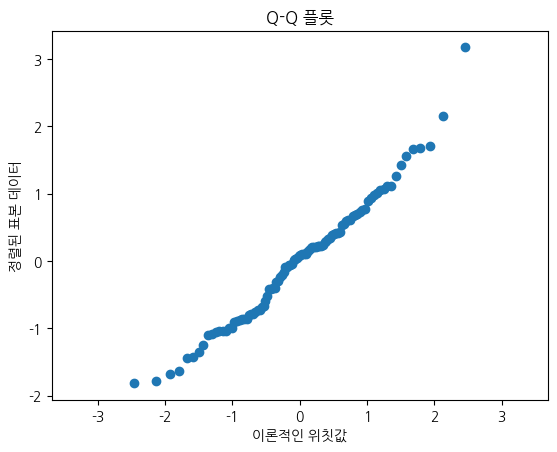

In [34]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.scatter(qf, x_sorted)
plt.title("Q-Q 플롯")
plt.xlabel("이론적인 위칫값")
plt.ylabel("정렬된 표본 데이터")
plt.axis("equal")
plt.show()

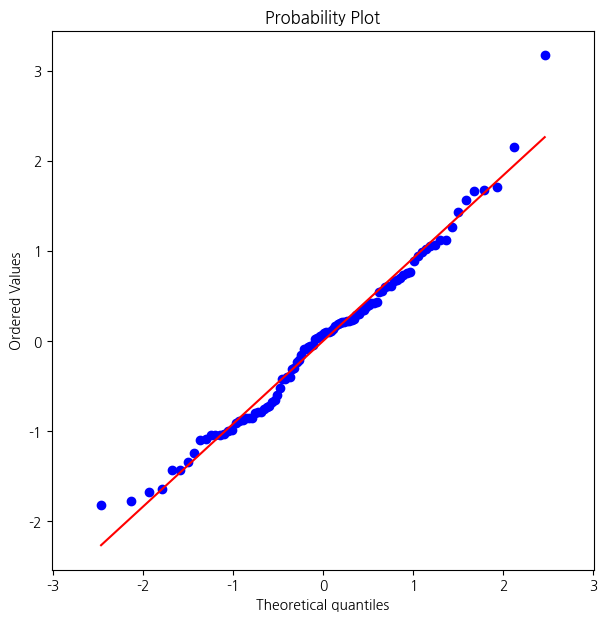

In [35]:
np.random.seed(0)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

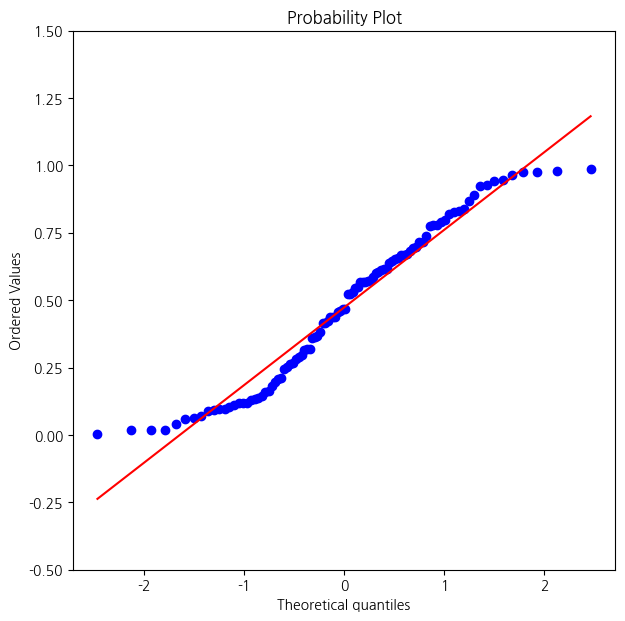

In [36]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

In [37]:
petal_width = load_iris().data[:, 3]

In [38]:
petal_width

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

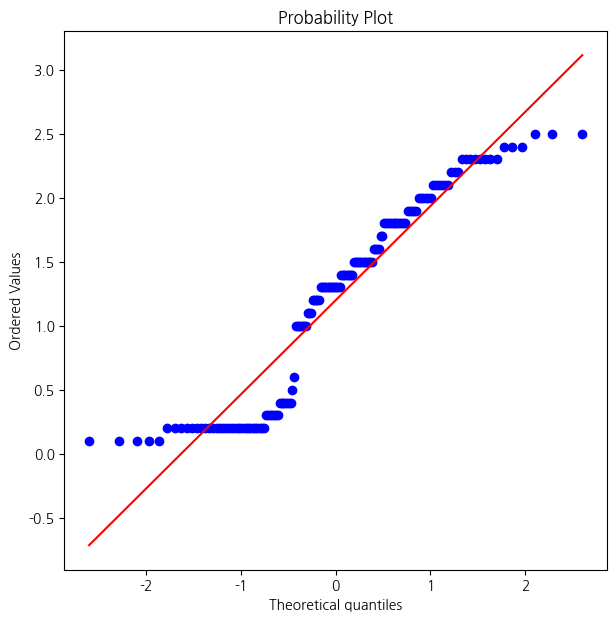

In [39]:
plt.figure(figsize=(7,7))
sp.stats.probplot(petal_width, plot =plt)
plt.show()

### 중심 극한 정리

여러개의 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상

확률변수의 평균들의 평균은 확률변수의 수가 무한히 많아지게 되면 모집단의 평균과 분산이 된다.

C:\Users\user\AppData\Local\Temp\ipykernel_5132\4215599775.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)


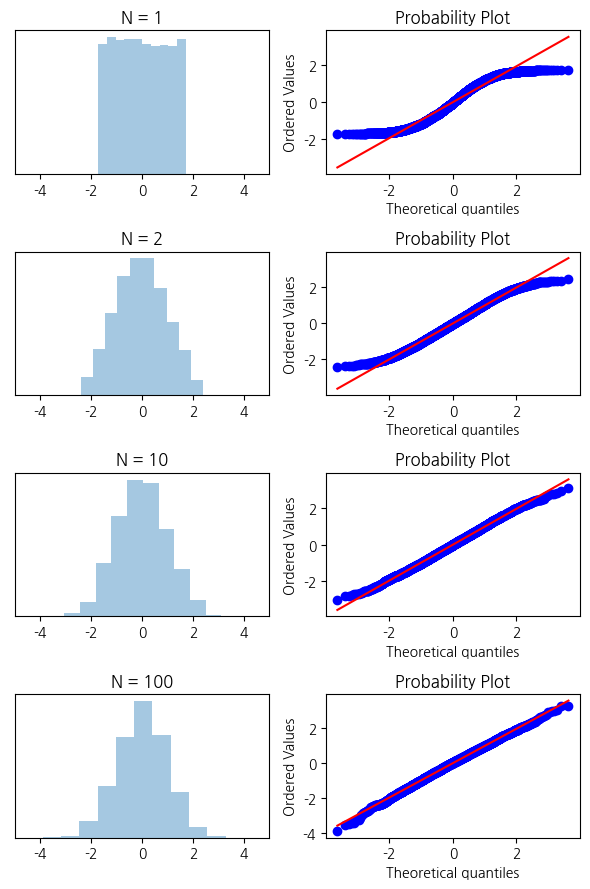

In [40]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10, 100]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(4, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(4, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

### 스튜던트 t분포

정규분포에서 양끝단의 분포가 많아지는 분포를 t분포(fat tail현상)

정규분포와 유사하지만 왼쪽오른쪽 부분이 더 길고 두꺼움

정규 분포의 평균을 찾을 떄 활용되고, 주로 표본의 크기가 작을 때 주로 사용되는 분포

표본의 크기가 작을수록 정규분포와 가까워진다.

- t분포의 기댓값
    
    정규분포와 동일 평균

- t분포의 분산
    
    $$Var[X]=\frac{v}{λ(v-2)}$$

In [41]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
data


,SP500,NASDAQCOM,DJCA,NIKKEI225
DATE,,,,
2017-11-29,2626.07,6824.39,8117.11,22597.20
2017-11-30,2647.58,6873.97,8229.31,22724.96
2017-12-01,2642.22,6847.59,8196.75,22819.03
2017-12-04,2639.44,6775.37,8240.32,22707.16
2017-12-05,2629.57,6762.21,8168.36,22622.38
...,...,...,...,...
2022-11-16,3958.79,11183.66,11183.82,28028.30
2022-11-17,3946.56,11144.96,11122.44,27930.57
2022-11-18,3965.34,11146.06,11216.86,27899.77


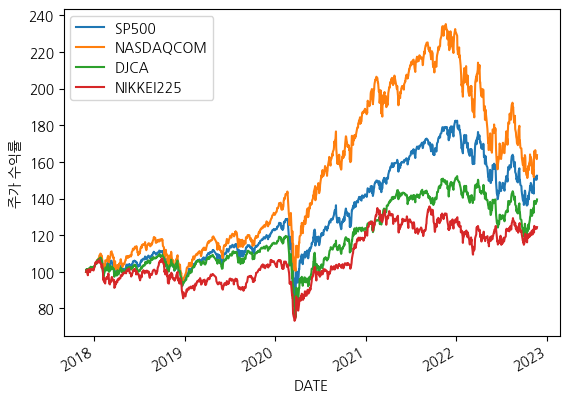

In [42]:
(data / data.iloc[0] * 100).plot()

plt.ylabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

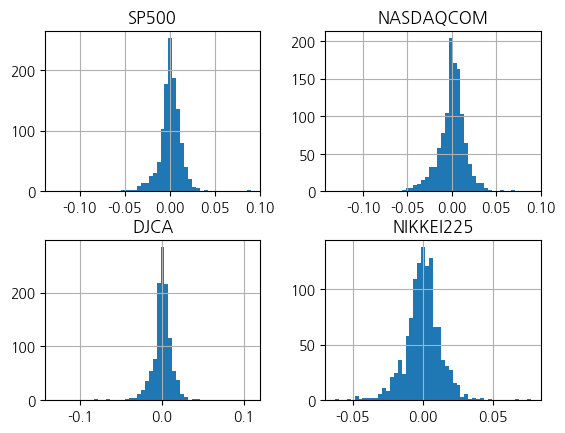

In [43]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

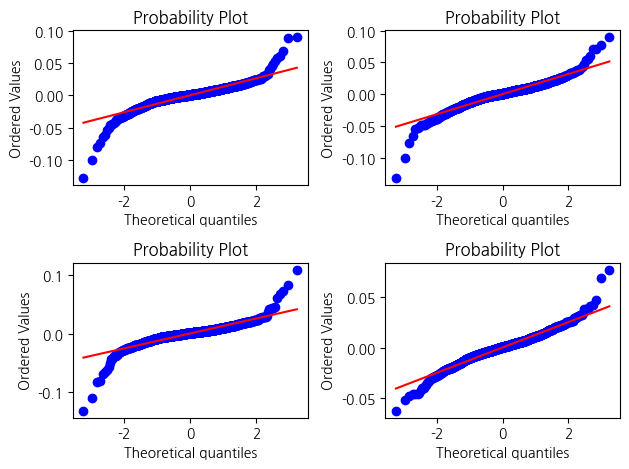

In [44]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

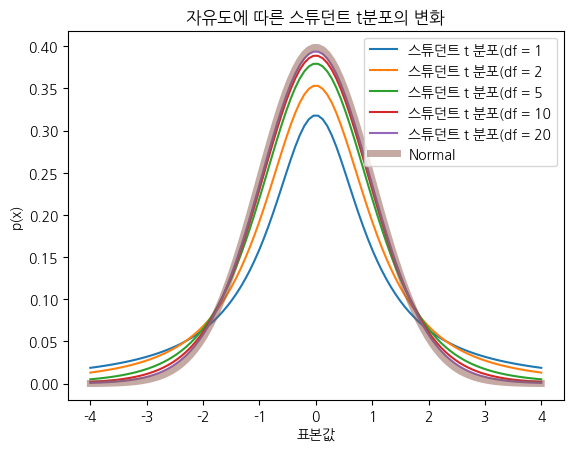

In [45]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label= f'스튜던트 t 분포(df = {df}')
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel('표본값')
plt.ylabel("p(x)")
plt.legend()
plt.show()

### 카이제곱 분포

얼마나 특별한 사건이 일어나는지를 확인하는 분포

t분포와는 다르게 제곱을 해서 양수값만 가지도록 만든것이 카이제곱 분포

표본 분포가 모분포를 잘 반영하는지 알아낼 때, 사용하는 분포

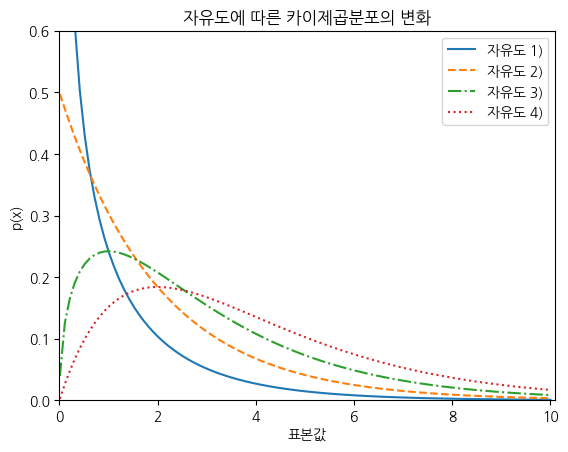

In [46]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]

for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

### F-분포

여러 집단에 대해서 각 집단의 평균이 의미있게 차이가 나는지 측정 할 때 사용된다.

선형 회귀 분석에 회귀분석모델이 전체 데이터 변동을 잘 설명하고 있는지 비교하기 위해서 사용된다.

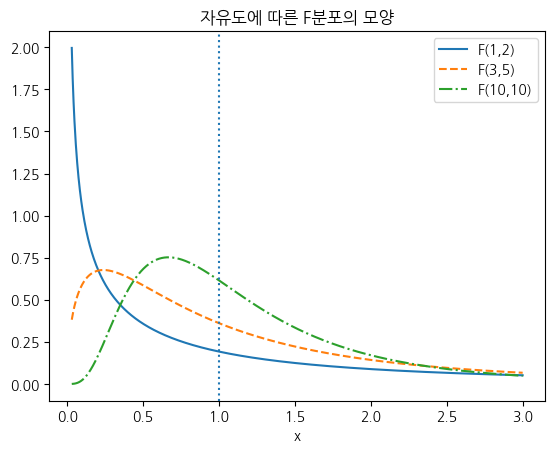

In [47]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

## 확률분포의 결정

확률변수가 베르누이, 이항, 정규분포중에 어떤 확률분포를 따르는지 알아내고 표본집단의 해당 확률분포의 모수 값을 구하는 작업 합니다.

- 데이터가 0, 1뿐이면 -> 베르누이 분포
- 데이터가 카테고리 값일 경우 -> 카테고리 분포
- 데이터가 0과 1사이의 실수 값일 경우 -> 베타분포
- 데이터가 항상 0이상일 경우 -> 로그정규분포, 감마분포, f분포, 카이제곱분포, 지수 등등
- 데이터가 제한이없고 연속된 실수일 경우 -> 정규분포, t분포, 스튜던트 t분포, 라플라스분포

데이터의 특성을 알면 어떤 분포를 따를지 추측이 가능하다.